In [13]:
import os
import numpy as np
import torch
from PIL import Image
import requests
from transformers import SamModel, SamProcessor
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
cache_dir = "./cache" # path to the cache directory

# create the cache directory if it doesn't exist
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = SamModel.from_pretrained("facebook/sam-vit-huge", cache_dir=cache_dir).to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-huge", cache_dir=cache_dir)

In [6]:
img_url = "https://huggingface.co/ybelkada/segment-anything/resolve/main/assets/car.png"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")
input_points = [[[450, 600]]]  # 2D location of a window in the image

inputs = processor(raw_image, input_points=input_points, return_tensors="pt").to(device)
outputs = model(**inputs)

masks = processor.image_processor.post_process_masks(
    outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu()
)
scores = outputs.iou_scores

AttributeError: 'list' object has no attribute 'shape'

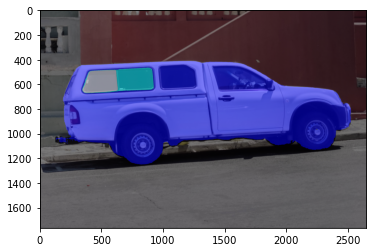

In [19]:
# plot the original image with mask overlay
# extract the mask for the single sample and convert to grayscale
mask = masks[0].squeeze().numpy()
mask = np.uint8(mask * 255)

# (3, 1764, 2646) is the shape of the raw image
# (1764, 2646, 3) is the shape of the mask

# transpose the mask to match the shape of the raw image
mask = np.transpose(mask, (1, 2, 0))
 
# plot the original image with the mask overlay
plt.imshow(raw_image)
plt.imshow(mask, alpha=0.5)
plt.show()